# Final Project


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Project Description

In recent years, streaming platforms with vast music libraries have become the go-to choice for music enthusiasts. However, the abundance of music options can overwhelm users when seeking new music that suits their preferences. To address this challenge, streaming services have turned to advanced techniques for music categorization, enabling personalized recommendations.

Our project revolves around analyzing the dataset collected by The Echo Nest, a renowned research group. The primary objective is to classify songs as either 'Hip-Hop' or 'Rock' without relying on audio listening. To achieve this, our project encompasses the following key steps:

1. **Data Preparation and Cleaning:** We will meticulously clean and preprocess The Echo Nest's raw music data to ensure data quality and consistency.

2. **Exploratory Data Insights:** Through exploratory data analysis (EDA), we will uncover insights, identify trends, and visualize the characteristics of the music dataset, gaining a deeper understanding of its contents.

3. **Data Enrichment:** To enhance the dataset's diversity and coverage, we will collect additional music data from reputable sources, broadening the range of songs available for classification.

4. **Machine Learning Models:** We will implement machine learning models, including classification algorithms, to predict song genres based on extracted audio features.

5. **Feature Reduction Techniques:** Employing feature reduction methods, we will optimize the dataset, improving model efficiency and reducing computational complexity.

6. **Model Evaluation:** Rigorous model evaluation will be performed using metrics such as accuracy, precision, recall, and F1-score to assess the models' performance.

7. **Personalized Recommendation System:** Utilizing the trained models, we will develop a recommendation system that delivers tailored music suggestions to users on streaming platforms.

8. **Documentation and Presentation:** Comprehensive project documentation will detail our methodology, findings, and implementation. We will create a presentation to effectively communicate the project's outcomes.

By completing this project successfully, we aim to elevate the music recommendation experience on streaming platforms, ensuring that users can effortlessly discover new music that resonates with their tastes.

---


## Interest Questions

1. Which variables have the highest correlation values (regardless of positive or negative)?
2. Are there any fields that can be removed from the DataFrame without compromising data integrity?
3. How does the acousticness variable compare between Rock and Hip-Hop?

---


## Variable Description


1. **_Track Id:_** A unique identifier for every song.

2. **_Bit Rate:_** The bit rate of the audio file, which represents the amount of data processed per unit of time. Typically measured in bits per second (bps) and indicates the audio file's quality or compression level.

3. **_Comments:_** The number of comments or user-generated text responses associated with the song, often found on online music platforms or social media.

4. **_Composer:_** The name of the composer who created the music or wrote the song.

5. **_Date Created:_** The date when the song or audio file was originally created or uploaded.

6. **_Date Recorded:_** The date when the song was recorded, which may be different from the date it was created or uploaded.

7. **_Duration:_** The length of the song or audio file in terms of time, usually measured in seconds, minutes, or hours.

8. **_Favorites:_** The number of times users have marked the song as a favorite or liked it on a music platform.

9. **_Genre top:_** The primary or main genre classification of the song, indicating the style or category of music it belongs to.

10. **_Genres:_** A list of additional genres or subgenres that the song may be associated with, providing more detailed information about its musical style.

11. **_Genres All:_** A comprehensive list of all genres and subgenres associated with the song, including both primary and secondary classifications.

12. **_Information:_** Additional information or metadata related to the song, which may include details about the artist, album, or other relevant information.

13. **_Interest:_** The level of interest or popularity of the song, often measured by metrics such as play count or user engagement.

14. **_Language Code:_** A code representing the language in which the song's lyrics or metadata are written, following language coding standards.

15. **_License:_** The type of license or legal terms associated with the song, indicating how it can be used, shared, or distributed.

16. **_Listens:_** The number of times the song has been listened to or streamed by users on a music platform.

17. **_Lyricist:_** The name of the lyricist or songwriter who wrote the lyrics for the song.

18. **_Number:_** A numerical identifier or track number within an album or playlist, used to order songs.

19. **_Publisher:_** The name of the publishing company or entity responsible for distributing or promoting the song.

20. **_Tags:_** Descriptive keywords or tags associated with the song, providing information about its content, mood, or themes.

21. **_Title:_** The title or name of the song.

22. **_Acousticness:_** A measure of the acoustic characteristics of the song, indicating how much of the sound is generated by acoustic instruments (e.g., acoustic guitars, pianos) as opposed to electronic or synthesized sounds.

23. **_Danceability:_** A measure of the song's suitability for dancing, based on factors such as tempo, rhythm, and beat.

24. **_Energy:_** A measure of the song's energy level or intensity, often associated with its loudness and speed.

25. **_Instrumentalness:_** A measure of the song's instrumental nature, indicating the presence of vocals (or lack thereof) in the track.

26. **_Liveness:_** A measure of the song's perceived live performance quality, indicating the presence of audience sounds or live elements.

27. **_Speechiness:_** A measure of the song's speech-like elements, such as spoken words or vocal components that are not sung.

28. **_Tempo:_** The tempo of the song, representing its speed or beats per minute (BPM).

29. **_Valence:_** A measure of the song's mood or emotional positivity, with higher values indicating a more positive or joyful mood and lower values indicating a more negative or sad mood.

---


## Data Import

For this project, we will mainly be using two data files: `fma-rock-vs-hiphop.csv` and `echonest-metrics.json`.


In [2]:
df_csv = pd.read_csv("../data/fma-rock-vs-hiphop.csv")
df_json = pd.read_json("../data/echonest-metrics.json", precise_float=True)

### CSV File

The `fma-rock-vs-hiphop.csv` file contains some general information for songs, having $17,734$ songs and $21$ variables.

<!-- The variables it contains are:

1. **_Track Id_**
2. **_Bit Rate_**
3. **_Comments_**
4. **_Composer_**
5. **_Date Created_**
6. **_Date Recorded_**
7. **_Duration_**
8. **_Favorites_**
9. **_Genre Top_**
10. **_Genres_**
11. **_Genres All_**
12. **_Information_**
13. **_Interests_**
14. **_Language Code_**
15. **_License_**
16. **_Listens_**
17. **_Lyricist_**
18. **_Number_**
19. **_Publisher_**
20. **_Tags_**
21. **_Title_** -->


In [3]:
df_csv.head()

track_id  bit_rate  comments        composer         date_created  \
0       135    256000         1             NaN  2008-11-26 01:43:26   
1       136    256000         1             NaN  2008-11-26 01:43:35   
2       151    192000         0             NaN  2008-11-26 01:44:55   
3       152    192000         0             NaN  2008-11-26 01:44:58   
4       153    256000         0  Arc and Sender  2008-11-26 01:45:00   

         date_recorded  duration  favorites genre_top    genres  ...  \
0  2008-11-26 00:00:00       837          0      Rock  [45, 58]  ...   
1  2008-11-26 00:00:00       509          0      Rock  [45, 58]  ...   
2                  NaN       192          0      Rock      [25]  ...   
3                  NaN       193          0      Rock      [25]  ...   
4  2008-11-26 00:00:00       405          5      Rock      [26]  ...   

  information interest  language_code  \
0         NaN     2484             en   
1         NaN     1948             en   
2         NaN      701             en   
3         NaN      637             en   
4         NaN      354             en   

                                             license listens  lyricist number  \
0  Attribution-NonCommercial-ShareAlike 3.0 Inter...    1832       NaN      0   
1  Attribution-NonCommercial-ShareAlike 3.0 Inter...    1498       NaN      0   
2  Attribution-NonCommercial-ShareAlike 3.0 Inter...     148       NaN      4   
3  Attribution-NonCommercial-ShareAlike 3.0 Inter...      98       NaN     11   
4  Attribution-NonCommercial-NoDerivatives (aka M...     424       NaN      2   

   publisher tags                       title  
0        NaN   []                Father's Day  
1        NaN   []  Peel Back The Mountain Sky  
2        NaN   []                 Untitled 04  
3        NaN   []                 Untitled 11  
4        NaN   []          Hundred-Year Flood  

[5 rows x 21 columns]

In [4]:
df_csv.shape

(17734, 21)

In [5]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17734 entries, 0 to 17733
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   track_id       17734 non-null  int64 
 1   bit_rate       17734 non-null  int64 
 2   comments       17734 non-null  int64 
 3   composer       166 non-null    object
 4   date_created   17734 non-null  object
 5   date_recorded  1898 non-null   object
 6   duration       17734 non-null  int64 
 7   favorites      17734 non-null  int64 
 8   genre_top      17734 non-null  object
 9   genres         17734 non-null  object
 10  genres_all     17734 non-null  object
 11  information    482 non-null    object
 12  interest       17734 non-null  int64 
 13  language_code  4089 non-null   object
 14  license        17714 non-null  object
 15  listens        17734 non-null  int64 
 16  lyricist       53 non-null     object
 17  number         17734 non-null  int64 
 18  publisher      52 non-null

### JSON File

On the other hand, `echonest-metrics.json` file contains song metadata for $13,129$ songs across $9$ variables.


In [6]:
df_json.head()

track_id  acousticness  danceability    energy  instrumentalness  liveness  \
0         2      0.416675      0.675894  0.634476          0.010628  0.177647   
1         3      0.374408      0.528643  0.817461          0.001851  0.105880   
2         5      0.043567      0.745566  0.701470          0.000697  0.373143   
3        10      0.951670      0.658179  0.924525          0.965427  0.115474   
4       134      0.452217      0.513238  0.560410          0.019443  0.096567   

   speechiness    tempo   valence  
0     0.159310  165.922  0.576661  
1     0.461818  126.957  0.269240  
2     0.124595  100.260  0.621661  
3     0.032985  111.562  0.963590  
4     0.525519  114.290  0.894072

In [7]:
df_json.shape

(13129, 9)

In [8]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13129 entries, 0 to 13128
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          13129 non-null  int64  
 1   acousticness      13129 non-null  float64
 2   danceability      13129 non-null  float64
 3   energy            13129 non-null  float64
 4   instrumentalness  13129 non-null  float64
 5   liveness          13129 non-null  float64
 6   speechiness       13129 non-null  float64
 7   tempo             13129 non-null  float64
 8   valence           13129 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 1.0 MB


After observing both DataFrames we discover that they both share the `track_id` attribute, which can be used in order to combine them.

---


## DataFrame Combination

After some research, we found that Pandas has 3 different functions used to combine DataFrames:

- `concat()`
- `merge()`
- `join()`

All of them will be tested to find the most optimal one.


As an initial preventive measure, we will be performing a test to find how many common `track_id` values are found along both DataFrames.

This number will be used as reference for how many rows the combined table should have.


In [9]:
count = 0
for id in df_json.track_id:
    if id in df_csv.track_id.values:
        count = count + 1

print(count)

4802


This means that any combination of the `.csv` and the `.json` DataFrames should have $4802$ rows, plus $29$ attribute columns.


### Concat

The first tested function is `concat()`.


In [10]:
df_concat_inner = pd.concat([df_csv, df_json], axis=1, join="inner")
df_concat_inner.head()

track_id  bit_rate  comments        composer         date_created  \
0      135    256000         1             NaN  2008-11-26 01:43:26   
1      136    256000         1             NaN  2008-11-26 01:43:35   
2      151    192000         0             NaN  2008-11-26 01:44:55   
3      152    192000         0             NaN  2008-11-26 01:44:58   
4      153    256000         0  Arc and Sender  2008-11-26 01:45:00   

         date_recorded  duration  favorites genre_top    genres  ...  \
0  2008-11-26 00:00:00       837          0      Rock  [45, 58]  ...   
1  2008-11-26 00:00:00       509          0      Rock  [45, 58]  ...   
2                  NaN       192          0      Rock      [25]  ...   
3                  NaN       193          0      Rock      [25]  ...   
4  2008-11-26 00:00:00       405          5      Rock      [26]  ...   

                        title track_id  acousticness danceability    energy  \
0                Father's Day        2      0.416675     0.675894  0.634476   
1  Peel Back The Mountain Sky        3      0.374408     0.528643  0.817461   
2                 Untitled 04        5      0.043567     0.745566  0.701470   
3                 Untitled 11       10      0.951670     0.658179  0.924525   
4          Hundred-Year Flood      134      0.452217     0.513238  0.560410   

   instrumentalness  liveness  speechiness    tempo   valence  
0          0.010628  0.177647     0.159310  165.922  0.576661  
1          0.001851  0.105880     0.461818  126.957  0.269240  
2          0.000697  0.373143     0.124595  100.260  0.621661  
3          0.965427  0.115474     0.032985  111.562  0.963590  
4          0.019443  0.096567     0.525519  114.290  0.894072  

[5 rows x 30 columns]

In [11]:
df_concat_outer = pd.concat([df_csv, df_json], axis=1, join="outer")
df_concat_outer.head()

track_id  bit_rate  comments        composer         date_created  \
0      135    256000         1             NaN  2008-11-26 01:43:26   
1      136    256000         1             NaN  2008-11-26 01:43:35   
2      151    192000         0             NaN  2008-11-26 01:44:55   
3      152    192000         0             NaN  2008-11-26 01:44:58   
4      153    256000         0  Arc and Sender  2008-11-26 01:45:00   

         date_recorded  duration  favorites genre_top    genres  ...  \
0  2008-11-26 00:00:00       837          0      Rock  [45, 58]  ...   
1  2008-11-26 00:00:00       509          0      Rock  [45, 58]  ...   
2                  NaN       192          0      Rock      [25]  ...   
3                  NaN       193          0      Rock      [25]  ...   
4  2008-11-26 00:00:00       405          5      Rock      [26]  ...   

                        title track_id  acousticness danceability    energy  \
0                Father's Day      2.0      0.416675     0.675894  0.634476   
1  Peel Back The Mountain Sky      3.0      0.374408     0.528643  0.817461   
2                 Untitled 04      5.0      0.043567     0.745566  0.701470   
3                 Untitled 11     10.0      0.951670     0.658179  0.924525   
4          Hundred-Year Flood    134.0      0.452217     0.513238  0.560410   

   instrumentalness  liveness  speechiness    tempo   valence  
0          0.010628  0.177647     0.159310  165.922  0.576661  
1          0.001851  0.105880     0.461818  126.957  0.269240  
2          0.000697  0.373143     0.124595  100.260  0.621661  
3          0.965427  0.115474     0.032985  111.562  0.963590  
4          0.019443  0.096567     0.525519  114.290  0.894072  

[5 rows x 30 columns]

In [12]:
df_concat_inner.shape

(13129, 30)

In [13]:
df_concat_outer.shape

(17734, 30)

As we can see, this method is not appropriate for a variety of reasons. First and foremost, there seems to be a problem with the columns of the new DataFrame, due to the `track_id` field being duplicated. Additionaly, the intended number of columns is far from what the calculated count resulted in, meaning thousands of songs have several `Nan` attributes.

The `concat()` function will not work with either inner nor outer joins, because it actually combines DataFrames in an horizontal level, not really looking for common attributes between them.


### Merge


Now the `merge()` function will be tested.


In [14]:
df_merge = pd.merge(df_csv, df_json, on="track_id")

In [15]:
df_merge.shape

(4802, 29)

Regarding the result provided from the `merge()` function, they appear to be in line with the previously established requierements, meaning we now have our first complete DataFrame with all song attributes.


In [16]:
music_data = df_merge

---


## Exploration Data Analysis

After having a first version of our data, we want to visualize it to have an idea of all the attributes.


In [17]:
music_data_original = music_data.copy()

In [18]:
music_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4802 entries, 0 to 4801
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          4802 non-null   int64  
 1   bit_rate          4802 non-null   int64  
 2   comments          4802 non-null   int64  
 3   composer          106 non-null    object 
 4   date_created      4802 non-null   object 
 5   date_recorded     1234 non-null   object 
 6   duration          4802 non-null   int64  
 7   favorites         4802 non-null   int64  
 8   genre_top         4802 non-null   object 
 9   genres            4802 non-null   object 
 10  genres_all        4802 non-null   object 
 11  information       334 non-null    object 
 12  interest          4802 non-null   int64  
 13  language_code     2599 non-null   object 
 14  license           4789 non-null   object 
 15  listens           4802 non-null   int64  
 16  lyricist          13 non-null     object 


### Nan Attributes Removal


The first thing we need to get an idea of is how many `Nan` values each of the attributes has.


In [19]:
music_data.isna().sum()

track_id               0
bit_rate               0
comments               0
composer            4696
date_created           0
date_recorded       3568
duration               0
favorites              0
genre_top              0
genres                 0
genres_all             0
information         4468
interest               0
language_code       2203
license               13
listens                0
lyricist            4789
number                 0
publisher           4775
tags                   0
title                  0
acousticness           0
danceability           0
energy                 0
instrumentalness       0
liveness               0
speechiness            0
tempo                  0
valence                0
dtype: int64

In [20]:
# describe the data without the track_id column

# copy = music_data.drop("track_id", axis=1).copy()
# copy.describe()

As we can see, some attributes have a large number of `Nan` values:

- `composer`
- `date_recorded`
- `information`
- `language_code`
- `lyricist`
- `publisher`

We are going to remove them from the DataFrame.


In [21]:
music_data = music_data.drop(
    [
        "composer",
        "date_recorded",
        "information",
        "language_code",
        "lyricist",
        "publisher",
    ],
    axis=1,
)

In [22]:
music_data.shape

(4802, 23)

In [23]:
music_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4802 entries, 0 to 4801
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          4802 non-null   int64  
 1   bit_rate          4802 non-null   int64  
 2   comments          4802 non-null   int64  
 3   date_created      4802 non-null   object 
 4   duration          4802 non-null   int64  
 5   favorites         4802 non-null   int64  
 6   genre_top         4802 non-null   object 
 7   genres            4802 non-null   object 
 8   genres_all        4802 non-null   object 
 9   interest          4802 non-null   int64  
 10  license           4789 non-null   object 
 11  listens           4802 non-null   int64  
 12  number            4802 non-null   int64  
 13  tags              4802 non-null   object 
 14  title             4802 non-null   object 
 15  acousticness      4802 non-null   float64
 16  danceability      4802 non-null   float64


In [24]:
music_data.head(3)

track_id  bit_rate  comments         date_created  duration  favorites  \
0       153    256000         0  2008-11-26 01:45:00       405          5   
1       154    256000         0  2008-11-26 01:45:04       319          1   
2       155    192000         0  2008-11-26 01:45:10       756          1   

  genre_top genres genres_all  interest  ... tags                    title  \
0      Rock   [26]   [26, 12]       354  ...   []       Hundred-Year Flood   
1      Rock   [26]   [26, 12]       242  ...   []      Squares And Circles   
2      Rock   [26]   [26, 12]       268  ...   []  Maps of the Stars Homes   

   acousticness danceability    energy  instrumentalness  liveness  \
0      0.988306     0.255661  0.979774          0.973006  0.121342   
1      0.970135     0.352946  0.023852          0.957113  0.113261   
2      0.981657     0.142249  0.912122          0.967294  0.363510   

   speechiness   tempo   valence  
0     0.051740  90.241  0.034018  
1     0.032177  53.758  0.035632  
2     0.087527  91.912  0.034325  

[3 rows x 23 columns]

### Irrelevant Attributes Removal

Now, taking into account the definitions provided for every variable, we consider the following attributes to be irrelevant for the intended purpose of this project:

- `Track id?`
- `Bit rate`
- `Comments`
- `Date created`
- `Favorites`
- `Genres`
- `Genres All`
- `License`
- `Number`
<!-- - `Interest` -->


In [25]:
music_data.shape

(4802, 23)

In [26]:
# music_data.drop("track_id", axis=1, inplace=True)

music_data.drop("bit_rate", axis=1, inplace=True)
music_data.drop("comments", axis=1, inplace=True)
music_data.drop("date_created", axis=1, inplace=True)
music_data.drop("favorites", axis=1, inplace=True)
music_data.drop("genres", axis=1, inplace=True)
music_data.drop("genres_all", axis=1, inplace=True)
# music_data.drop("interest", axis=1, inplace=True)
music_data.drop("license", axis=1, inplace=True)
music_data.drop("number", axis=1, inplace=True)

In [27]:
music_data_clean = music_data.copy()
music_data_clean.shape

(4802, 15)

In [28]:
music_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4802 entries, 0 to 4801
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          4802 non-null   int64  
 1   duration          4802 non-null   int64  
 2   genre_top         4802 non-null   object 
 3   interest          4802 non-null   int64  
 4   listens           4802 non-null   int64  
 5   tags              4802 non-null   object 
 6   title             4802 non-null   object 
 7   acousticness      4802 non-null   float64
 8   danceability      4802 non-null   float64
 9   energy            4802 non-null   float64
 10  instrumentalness  4802 non-null   float64
 11  liveness          4802 non-null   float64
 12  speechiness       4802 non-null   float64
 13  tempo             4802 non-null   float64
 14  valence           4802 non-null   float64
dtypes: float64(8), int64(4), object(3)
memory usage: 562.9+ KB


### Univariate Analysis


Before analyzing the remaining columns, we will transform the `track_id` attribute into a `str`, so it doesn't interfere with future numerical procedures.


In [29]:
# turn all track_id values into strings
music_data_clean["track_id"] = music_data_clean["track_id"].astype(str)

In [30]:
for id in music_data_clean["track_id"]:
    if type(id) != str:
        print("Int found")
        break

In [31]:
music_data_clean.dtypes

track_id             object
duration              int64
genre_top            object
interest              int64
listens               int64
tags                 object
title                object
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
liveness            float64
speechiness         float64
tempo               float64
valence             float64
dtype: object

#### Basic Statistics


In [32]:
music_data_clean.describe()

duration      interest        listens  acousticness  danceability  \
count  4802.000000  4.802000e+03    4802.000000  4.802000e+03   4802.000000   
mean    229.256768  1.913525e+03    1091.146189  4.870600e-01      0.436556   
std     190.619206  1.631005e+04    7490.835102  3.681396e-01      0.183502   
min      18.000000  6.300000e+01      12.000000  9.491000e-07      0.051307   
25%     144.000000  4.310000e+02     194.250000  8.351236e-02      0.296047   
50%     198.000000  8.355000e+02     395.000000  5.156888e-01      0.419447   
75%     261.000000  1.579000e+03     867.750000  8.555765e-01      0.565339   
max    3033.000000  1.038669e+06  433992.000000  9.957965e-01      0.961871   

            energy  instrumentalness     liveness  speechiness        tempo  \
count  4802.000000       4802.000000  4802.000000  4802.000000  4802.000000   
mean      0.625126          0.604096     0.187997     0.104877   126.687944   
std       0.244051          0.376487     0.150562     0.145934    34.002473   
min       0.000279          0.000000     0.025297     0.023234    29.093000   
25%       0.450757          0.164972     0.104052     0.036897    98.000750   
50%       0.648374          0.808752     0.123080     0.049594   124.625500   
75%       0.837016          0.915472     0.215151     0.088290   151.450000   
max       0.999768          0.993134     0.971392     0.966177   250.059000   

           valence  
count  4802.000000  
mean      0.453413  
std       0.266632  
min       0.014392  
25%       0.224617  
50%       0.446240  
75%       0.666914  
max       0.983649

In [33]:
music_data_clean.describe(include="object")

track_id genre_top  tags            title
count      4802      4802  4802             4802
unique     4802         2    66             4638
top         153      Rock    []  (title unknown)
freq          1      3892  4353               13

In [34]:
sns.set_style("white")
# sns.set_palette("Set2")

##### Genre


Text(0.5, 1.0, 'Genre Distribution')

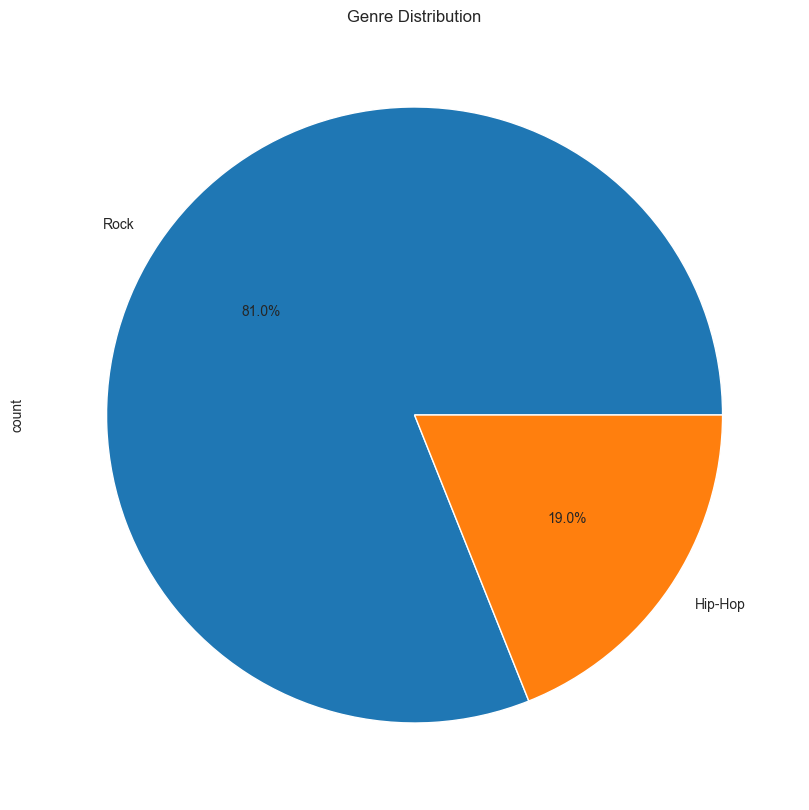

In [35]:
# pie chart of the genre
music_data_clean["genre_top"].value_counts().plot.pie(
    figsize=(10, 10), autopct="%1.1f%%"
)
plt.title("Genre Distribution")

##### Duration


/Users/gajokremer/Documents/Career/Semester VII/Artificial_Intelligence/AI-Final-Project/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gajokremer/Documents/Career/Semester VII/Artificial_Intelligence/AI-Final-Project/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gajokremer/Documents/Career/Semester VII/Artificial_Intelligence/AI-Final-Project/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vect

Text(0.5, 1.0, 'Duration of Songs')

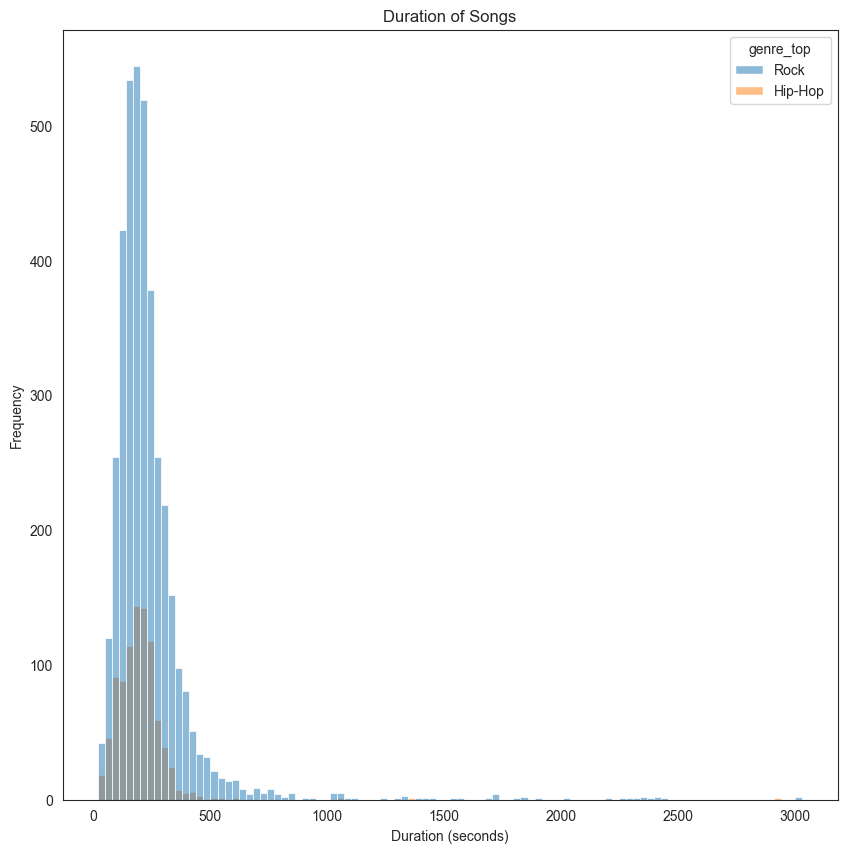

In [36]:
# music_data_clean.hist(figsize=(10, 10), bins=100, column="duration")
# plt.xlabel("Duration (seconds)")
# plt.ylabel("Frequency")
# plt.title("Duration of Songs")
# plt.show()


plt.figure(figsize=(10, 10))
sns.histplot(data=music_data_clean, x="duration", bins=100, hue="genre_top", fill=True)
plt.xlabel("Duration (seconds)")
plt.ylabel("Frequency")
plt.title("Duration of Songs")

##### Interest


/Users/gajokremer/Documents/Career/Semester VII/Artificial_Intelligence/AI-Final-Project/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gajokremer/Documents/Career/Semester VII/Artificial_Intelligence/AI-Final-Project/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gajokremer/Documents/Career/Semester VII/Artificial_Intelligence/AI-Final-Project/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vect

Text(0.5, 1.0, 'Interest of Songs')

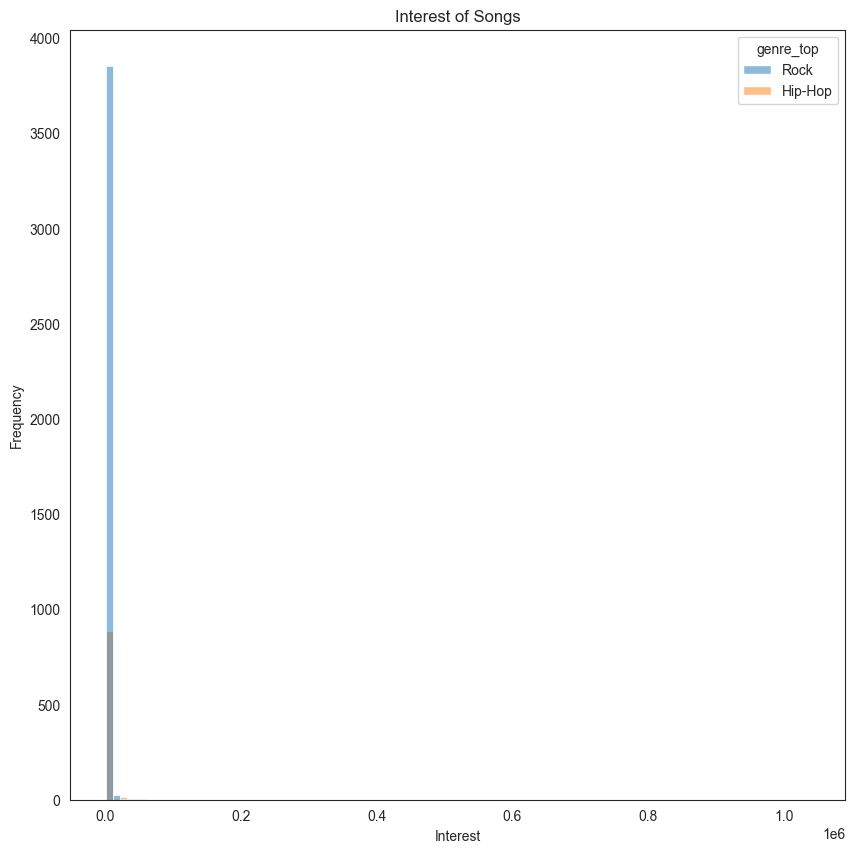

In [37]:
plt.figure(figsize=(10, 10))
sns.histplot(data=music_data_clean, x="interest", bins=100, hue="genre_top", fill=True)
plt.xlabel("Interest")
plt.ylabel("Frequency")
plt.title("Interest of Songs")

##### Listens


/Users/gajokremer/Documents/Career/Semester VII/Artificial_Intelligence/AI-Final-Project/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gajokremer/Documents/Career/Semester VII/Artificial_Intelligence/AI-Final-Project/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gajokremer/Documents/Career/Semester VII/Artificial_Intelligence/AI-Final-Project/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vect

Text(0.5, 1.0, 'Listens of Songs')

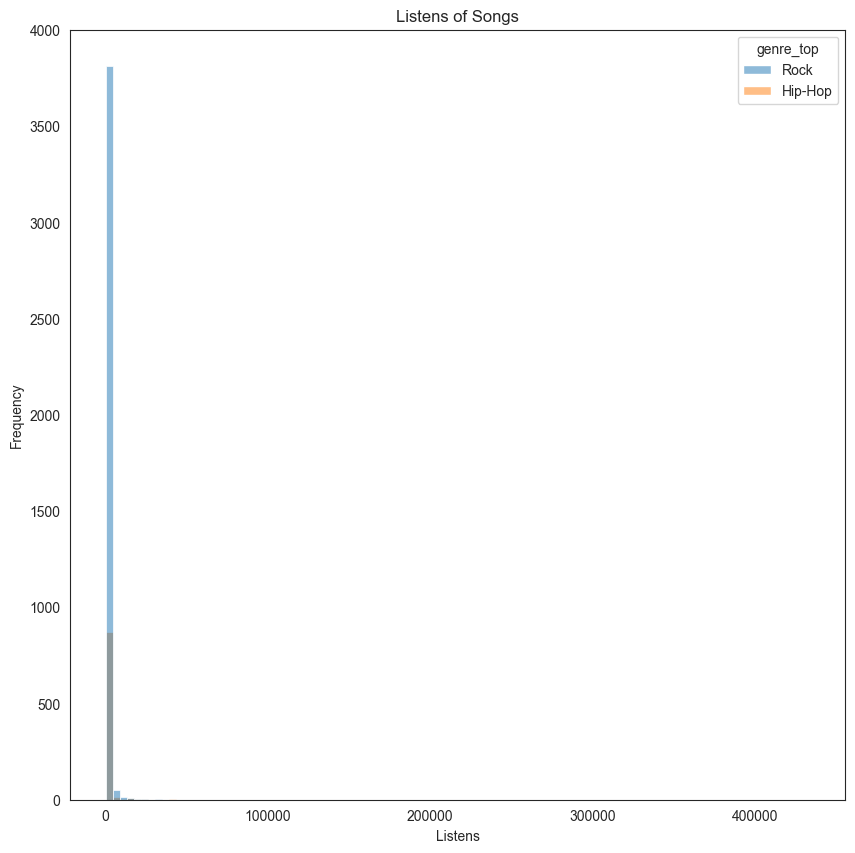

In [38]:
plt.figure(figsize=(10, 10))
sns.histplot(data=music_data_clean, x="listens", bins=100, hue="genre_top", fill=True)
plt.xlabel("Listens")
plt.ylabel("Frequency")
plt.title("Listens of Songs")

##### Acousticness


/Users/gajokremer/Documents/Career/Semester VII/Artificial_Intelligence/AI-Final-Project/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gajokremer/Documents/Career/Semester VII/Artificial_Intelligence/AI-Final-Project/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gajokremer/Documents/Career/Semester VII/Artificial_Intelligence/AI-Final-Project/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vect

Text(0.5, 1.0, 'Acousticness of Songs')

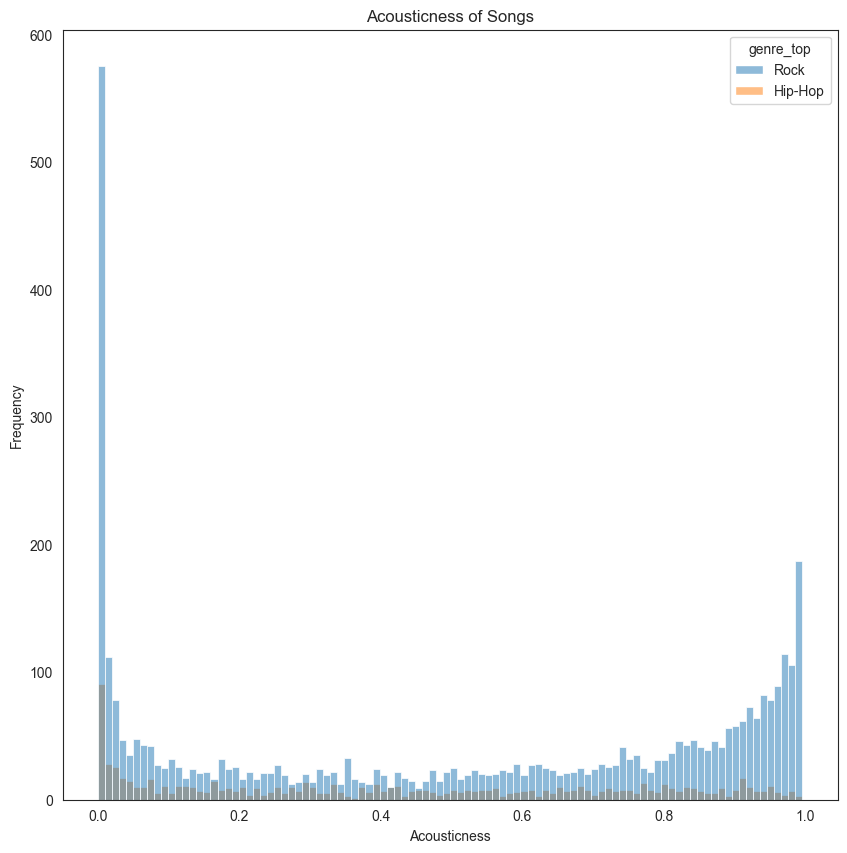

In [39]:
plt.figure(figsize=(10, 10))
sns.histplot(
    data=music_data_clean, x="acousticness", bins=100, hue="genre_top", fill=True
)
plt.xlabel("Acousticness")
plt.ylabel("Frequency")
plt.title("Acousticness of Songs")

##### Danceability


/Users/gajokremer/Documents/Career/Semester VII/Artificial_Intelligence/AI-Final-Project/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gajokremer/Documents/Career/Semester VII/Artificial_Intelligence/AI-Final-Project/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gajokremer/Documents/Career/Semester VII/Artificial_Intelligence/AI-Final-Project/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vect

Text(0.5, 1.0, 'Danceability of Songs')

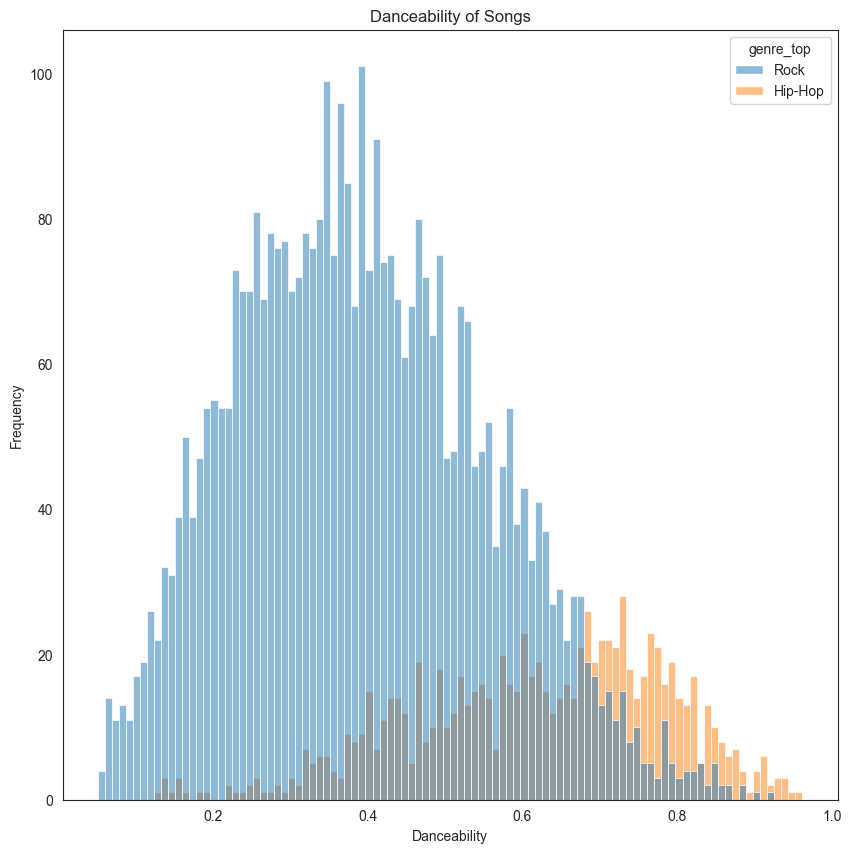

In [40]:
plt.figure(figsize=(10, 10))
sns.histplot(
    data=music_data_clean, x="danceability", bins=100, hue="genre_top", fill=True
)
plt.xlabel("Danceability")
plt.ylabel("Frequency")
plt.title("Danceability of Songs")

##### Energy


/Users/gajokremer/Documents/Career/Semester VII/Artificial_Intelligence/AI-Final-Project/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gajokremer/Documents/Career/Semester VII/Artificial_Intelligence/AI-Final-Project/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gajokremer/Documents/Career/Semester VII/Artificial_Intelligence/AI-Final-Project/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vect

Text(0.5, 1.0, 'Energy of Songs')

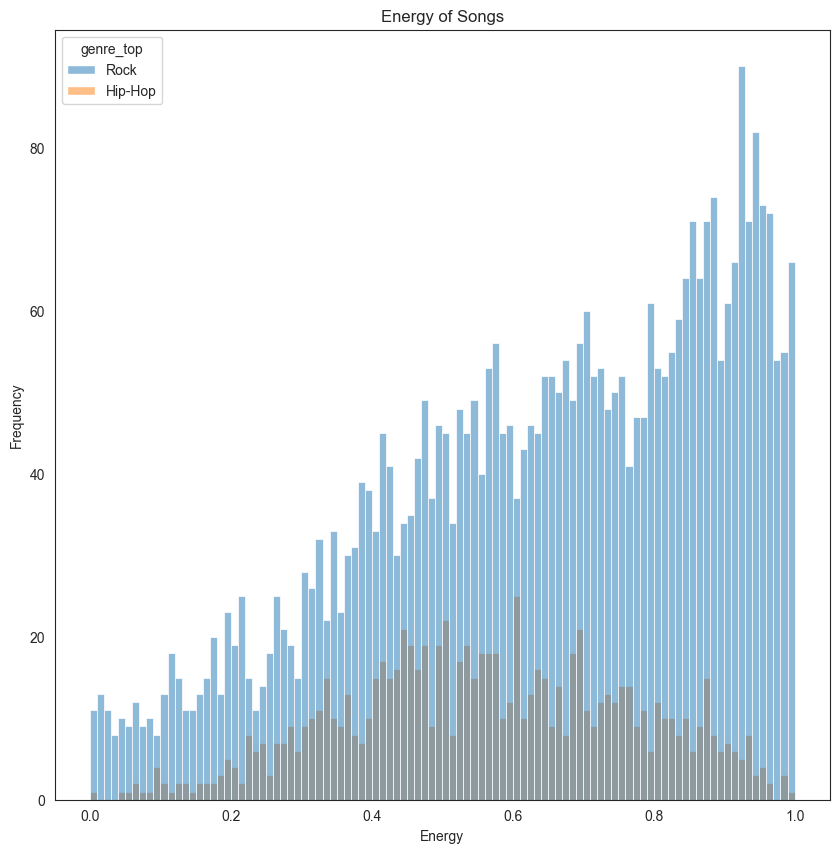

In [41]:
plt.figure(figsize=(10, 10))
sns.histplot(data=music_data_clean, x="energy", bins=100, hue="genre_top", fill=True)
plt.xlabel("Energy")
plt.ylabel("Frequency")
plt.title("Energy of Songs")

##### Instrumentalness


/Users/gajokremer/Documents/Career/Semester VII/Artificial_Intelligence/AI-Final-Project/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gajokremer/Documents/Career/Semester VII/Artificial_Intelligence/AI-Final-Project/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gajokremer/Documents/Career/Semester VII/Artificial_Intelligence/AI-Final-Project/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vect

Text(0.5, 1.0, 'Instrumentalness of Songs')

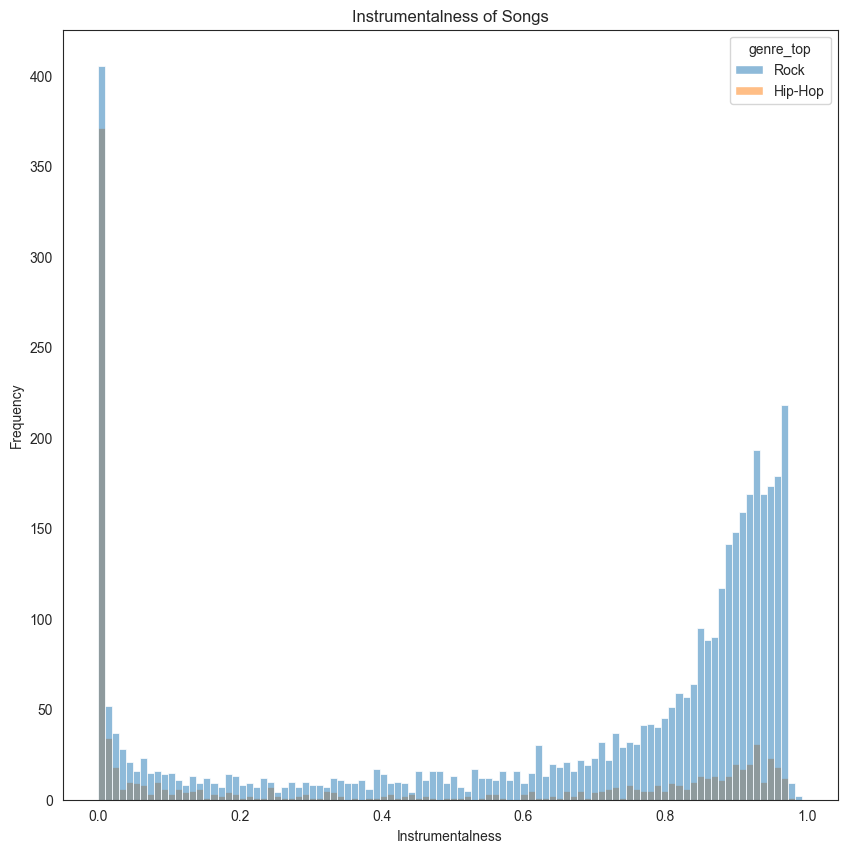

In [42]:
plt.figure(figsize=(10, 10))
sns.histplot(data=music_data_clean, x="instrumentalness", bins=100, hue="genre_top")
plt.xlabel("Instrumentalness")
plt.ylabel("Frequency")
plt.title("Instrumentalness of Songs")

##### Liveness


/Users/gajokremer/Documents/Career/Semester VII/Artificial_Intelligence/AI-Final-Project/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gajokremer/Documents/Career/Semester VII/Artificial_Intelligence/AI-Final-Project/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gajokremer/Documents/Career/Semester VII/Artificial_Intelligence/AI-Final-Project/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vect

Text(0.5, 1.0, 'Liveness of Songs')

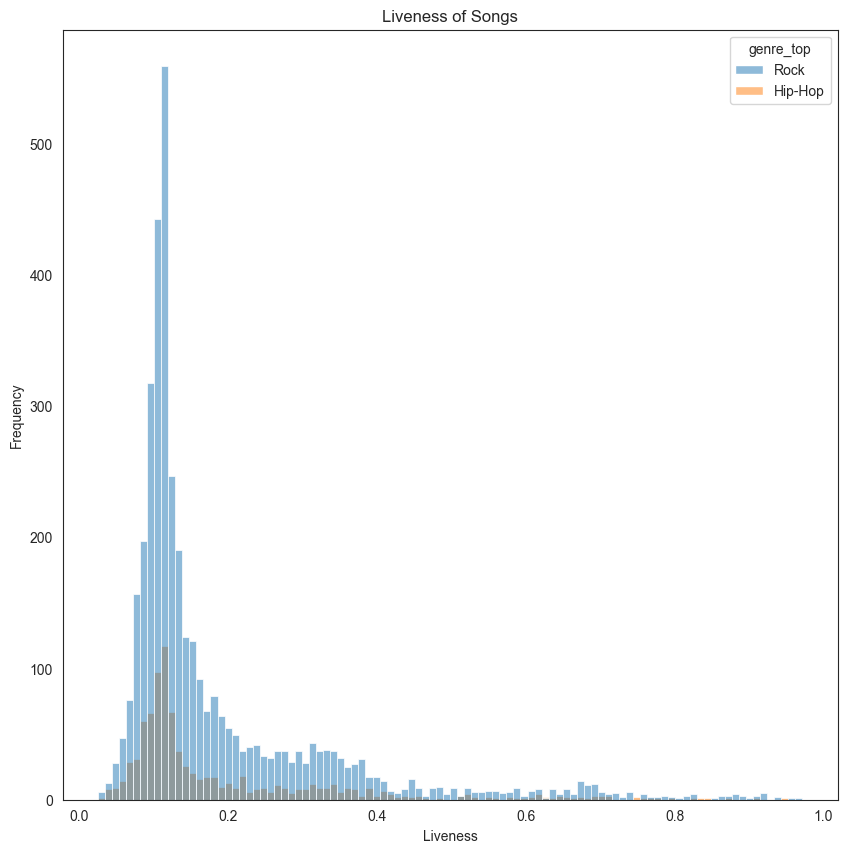

In [43]:
plt.figure(figsize=(10, 10))
sns.histplot(data=music_data_clean, x="liveness", bins=100, hue="genre_top", fill=True)
plt.xlabel("Liveness")
plt.ylabel("Frequency")
plt.title("Liveness of Songs")

##### Speachiness


/Users/gajokremer/Documents/Career/Semester VII/Artificial_Intelligence/AI-Final-Project/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gajokremer/Documents/Career/Semester VII/Artificial_Intelligence/AI-Final-Project/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gajokremer/Documents/Career/Semester VII/Artificial_Intelligence/AI-Final-Project/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vect

Text(0.5, 1.0, 'Speechiness of Songs')

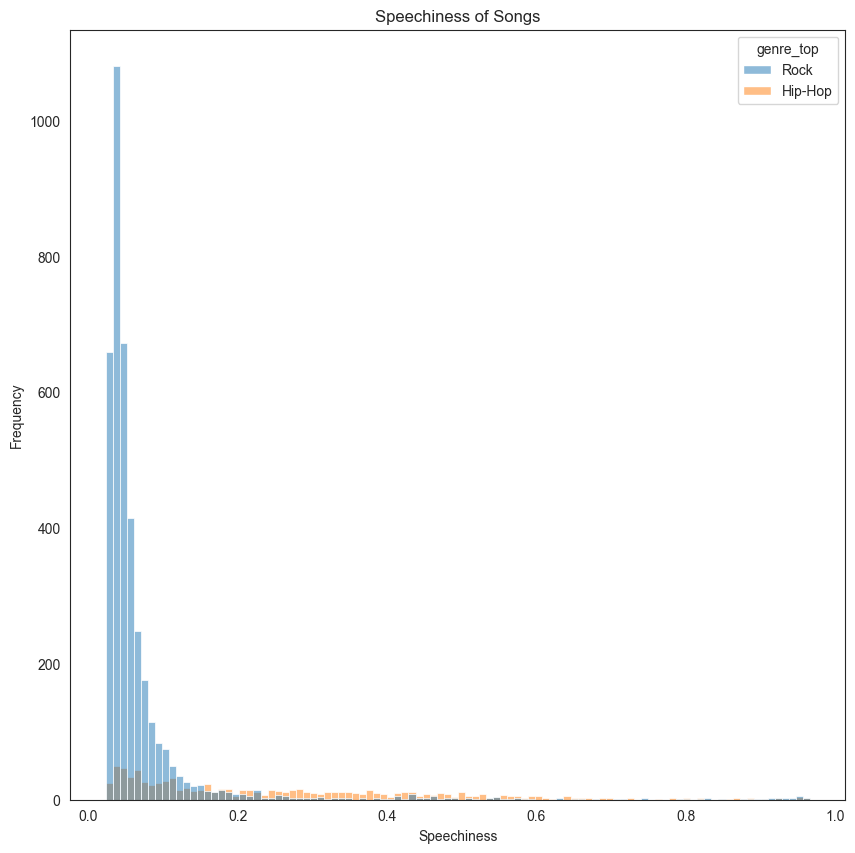

In [44]:
plt.figure(figsize=(10, 10))
sns.histplot(
    data=music_data_clean, x="speechiness", bins=100, hue="genre_top", fill=True
)
plt.xlabel("Speechiness")
plt.ylabel("Frequency")
plt.title("Speechiness of Songs")

##### Tempo


/Users/gajokremer/Documents/Career/Semester VII/Artificial_Intelligence/AI-Final-Project/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gajokremer/Documents/Career/Semester VII/Artificial_Intelligence/AI-Final-Project/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gajokremer/Documents/Career/Semester VII/Artificial_Intelligence/AI-Final-Project/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vect

Text(0.5, 1.0, 'Tempo of Songs')

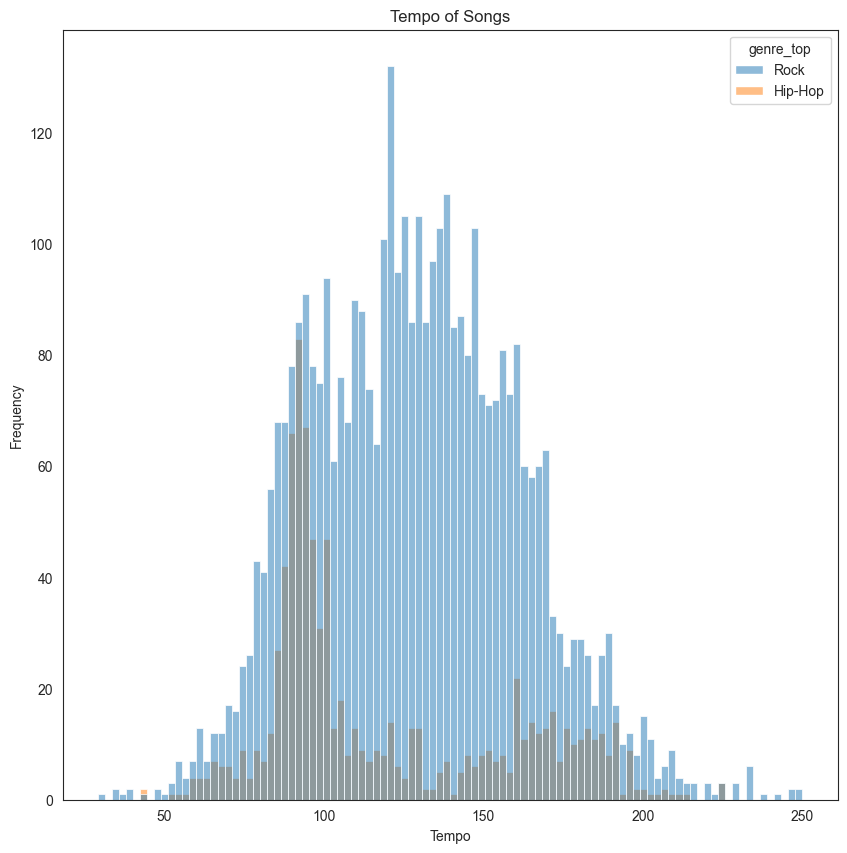

In [45]:
plt.figure(figsize=(10, 10))
sns.histplot(data=music_data_clean, x="tempo", bins=100, hue="genre_top", fill=True)
plt.xlabel("Tempo")
plt.ylabel("Frequency")
plt.title("Tempo of Songs")

##### Valence


/Users/gajokremer/Documents/Career/Semester VII/Artificial_Intelligence/AI-Final-Project/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gajokremer/Documents/Career/Semester VII/Artificial_Intelligence/AI-Final-Project/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gajokremer/Documents/Career/Semester VII/Artificial_Intelligence/AI-Final-Project/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vect

Text(0.5, 1.0, 'Valence of Songs')

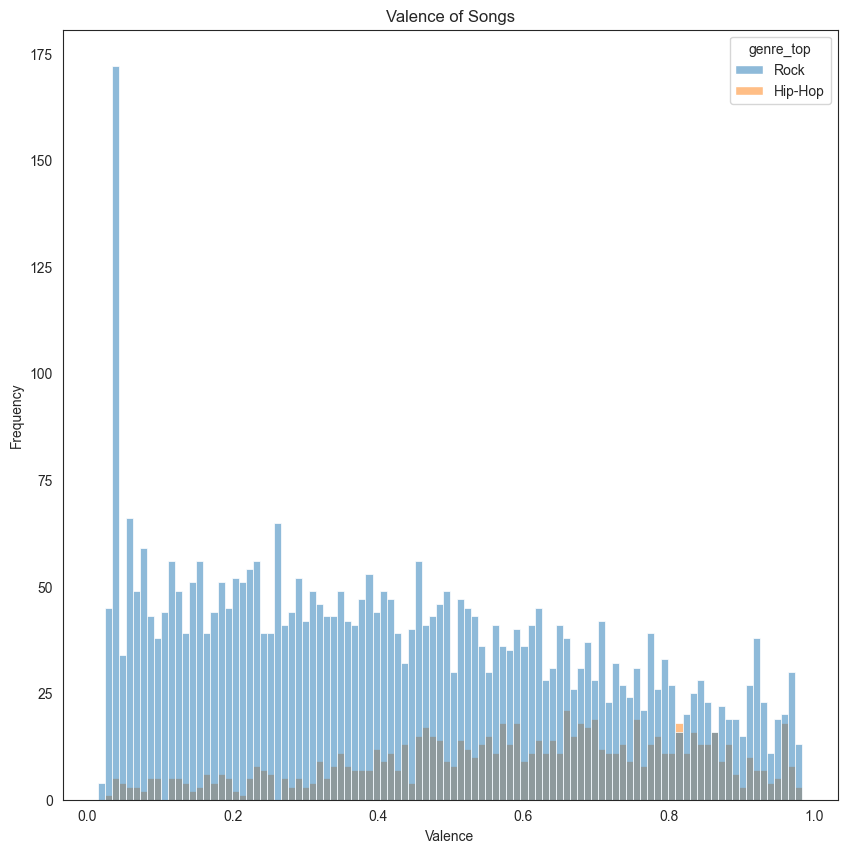

In [46]:
plt.figure(figsize=(10, 10))
sns.histplot(data=music_data_clean, x="valence", bins=100, hue="genre_top", fill=True)
plt.xlabel("Valence")
plt.ylabel("Frequency")
plt.title("Valence of Songs")

#### Bivariate Analysis


##### Scatterplots


/Users/gajokremer/Documents/Career/Semester VII/Artificial_Intelligence/AI-Final-Project/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gajokremer/Documents/Career/Semester VII/Artificial_Intelligence/AI-Final-Project/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gajokremer/Documents/Career/Semester VII/Artificial_Intelligence/AI-Final-Project/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vect

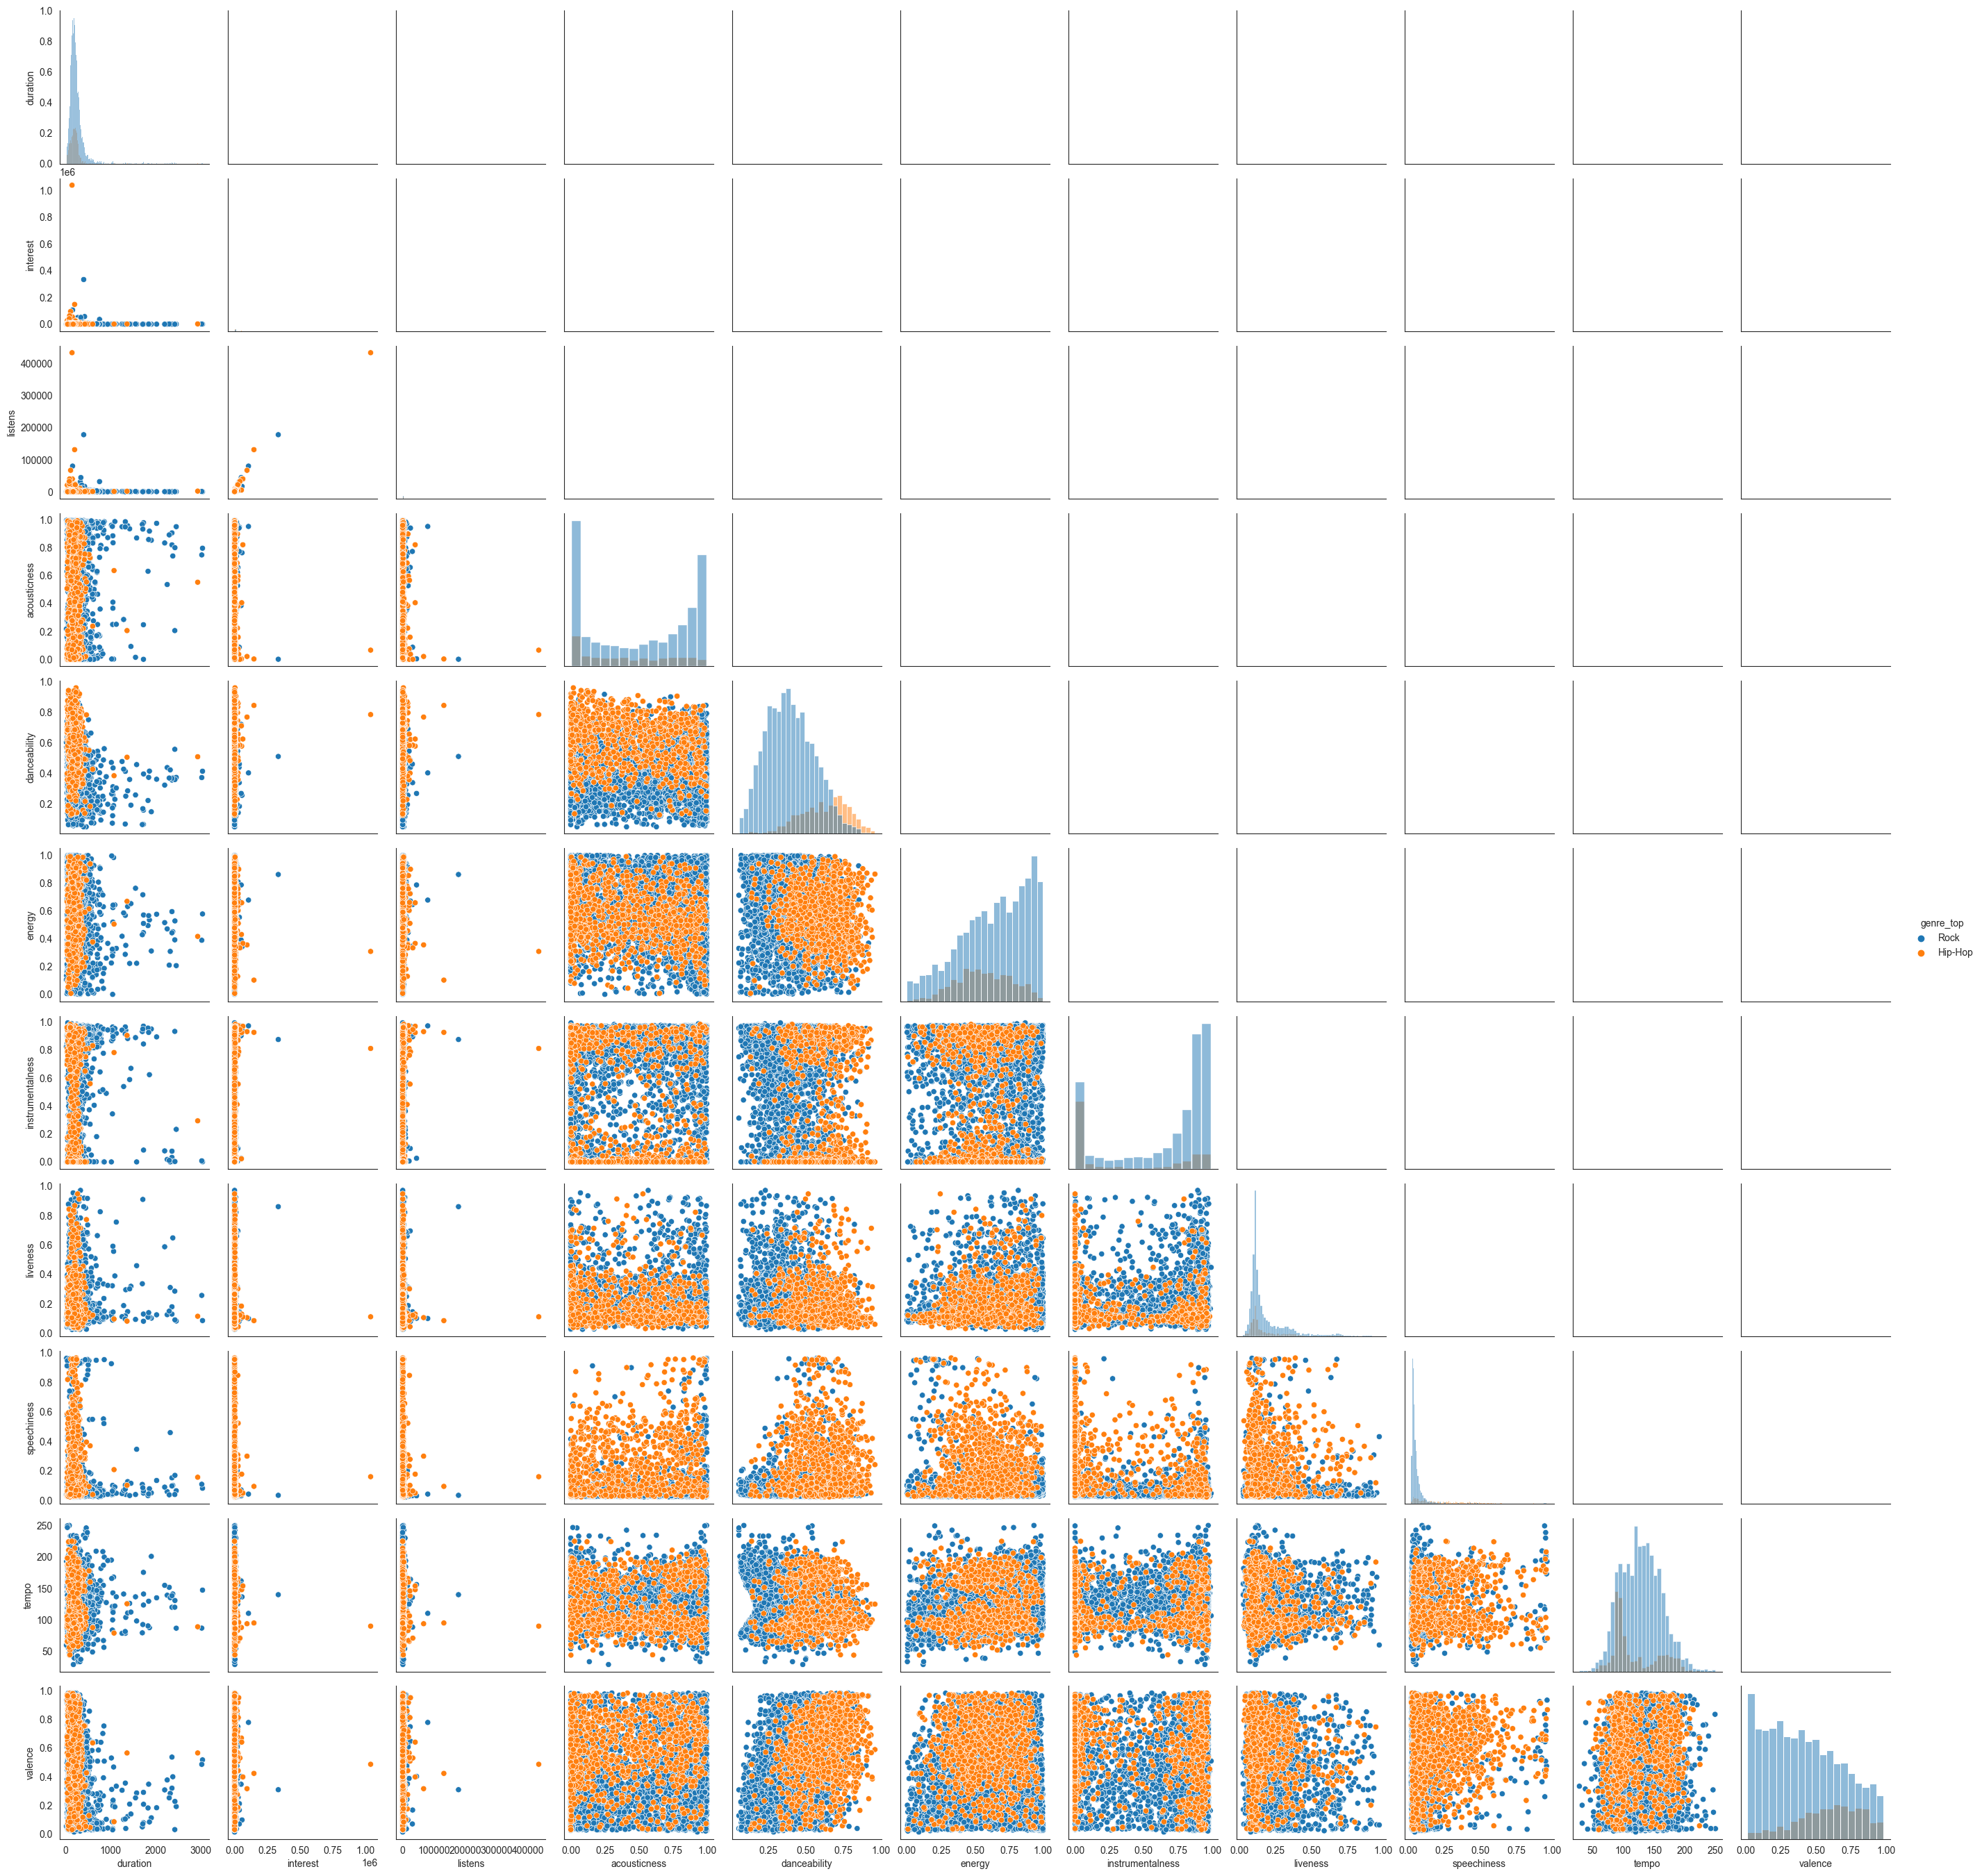

In [47]:
# sns.set_style("white")
# sns.set_palette("Set2")

g = sns.PairGrid(
    data=music_data_clean, diag_sharey=False, corner=False, hue="genre_top"
)

g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)

g.add_legend()
plt.show()

##### HeatMap


In [48]:
# extract dataframe with 3 columns from correlation_data

columns = [
    "duration",
    "interest",
    "listens",
    "acousticness",
    "danceability",
    "energy",
    "instrumentalness",
    "liveness",
    "speechiness",
    "tempo",
    "valence",
]

In [49]:
# sns.pairplot(correlation_data[columns])

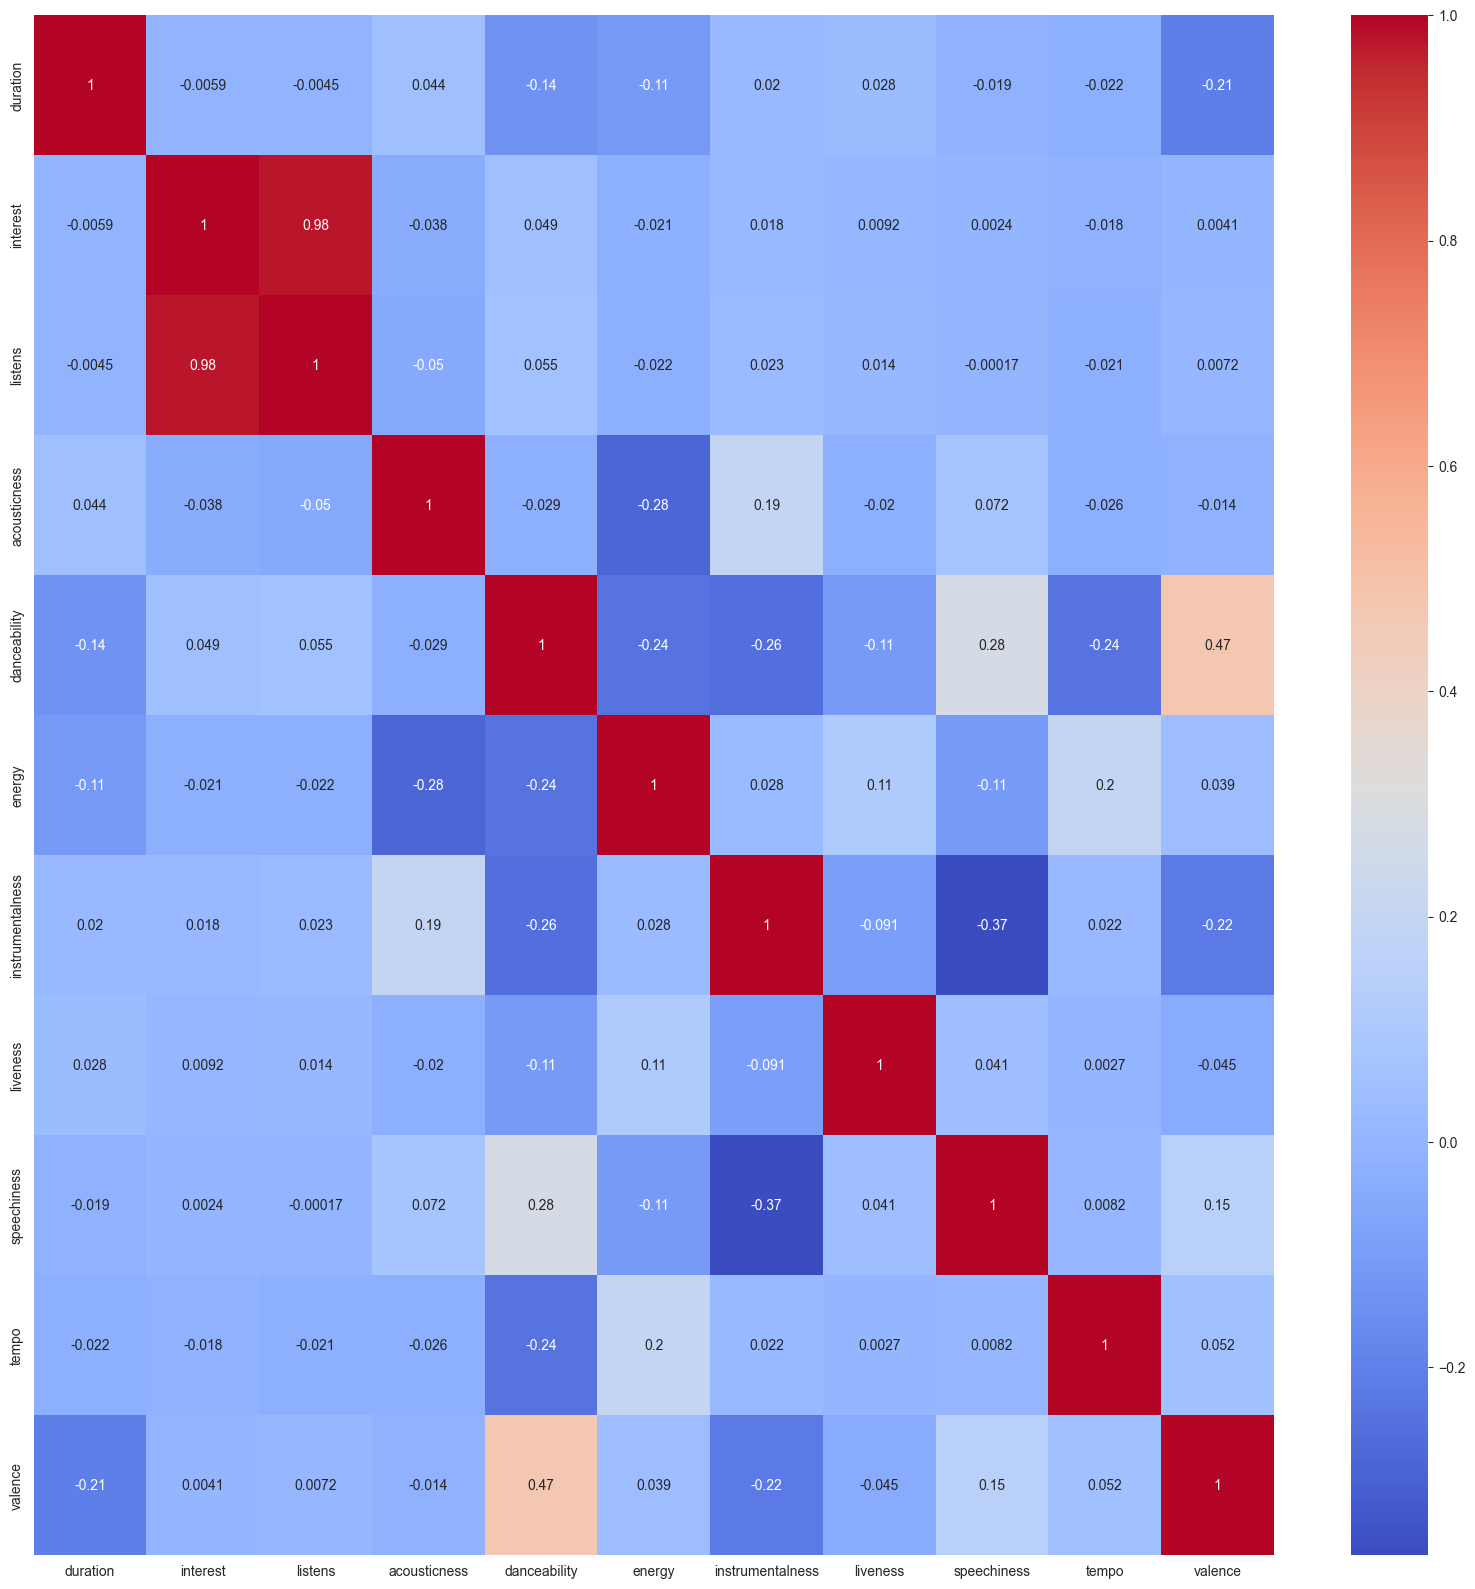

In [50]:
plt.figure(figsize=(20, 20))
sns.heatmap(music_data_clean[columns].corr(), annot=True, cmap="coolwarm")
plt.show()

As it is clearly shown in the above heatmap, there is an extremely high correlation between `interest` and `listens`, which means that they are almost identical. This is not benefitial, so we may drop one of them.


In [51]:
music_data_clean.drop("interest", axis=1, inplace=True)
columns.remove("interest")

In [52]:
music_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4802 entries, 0 to 4801
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          4802 non-null   object 
 1   duration          4802 non-null   int64  
 2   genre_top         4802 non-null   object 
 3   listens           4802 non-null   int64  
 4   tags              4802 non-null   object 
 5   title             4802 non-null   object 
 6   acousticness      4802 non-null   float64
 7   danceability      4802 non-null   float64
 8   energy            4802 non-null   float64
 9   instrumentalness  4802 non-null   float64
 10  liveness          4802 non-null   float64
 11  speechiness       4802 non-null   float64
 12  tempo             4802 non-null   float64
 13  valence           4802 non-null   float64
dtypes: float64(8), int64(2), object(4)
memory usage: 525.3+ KB


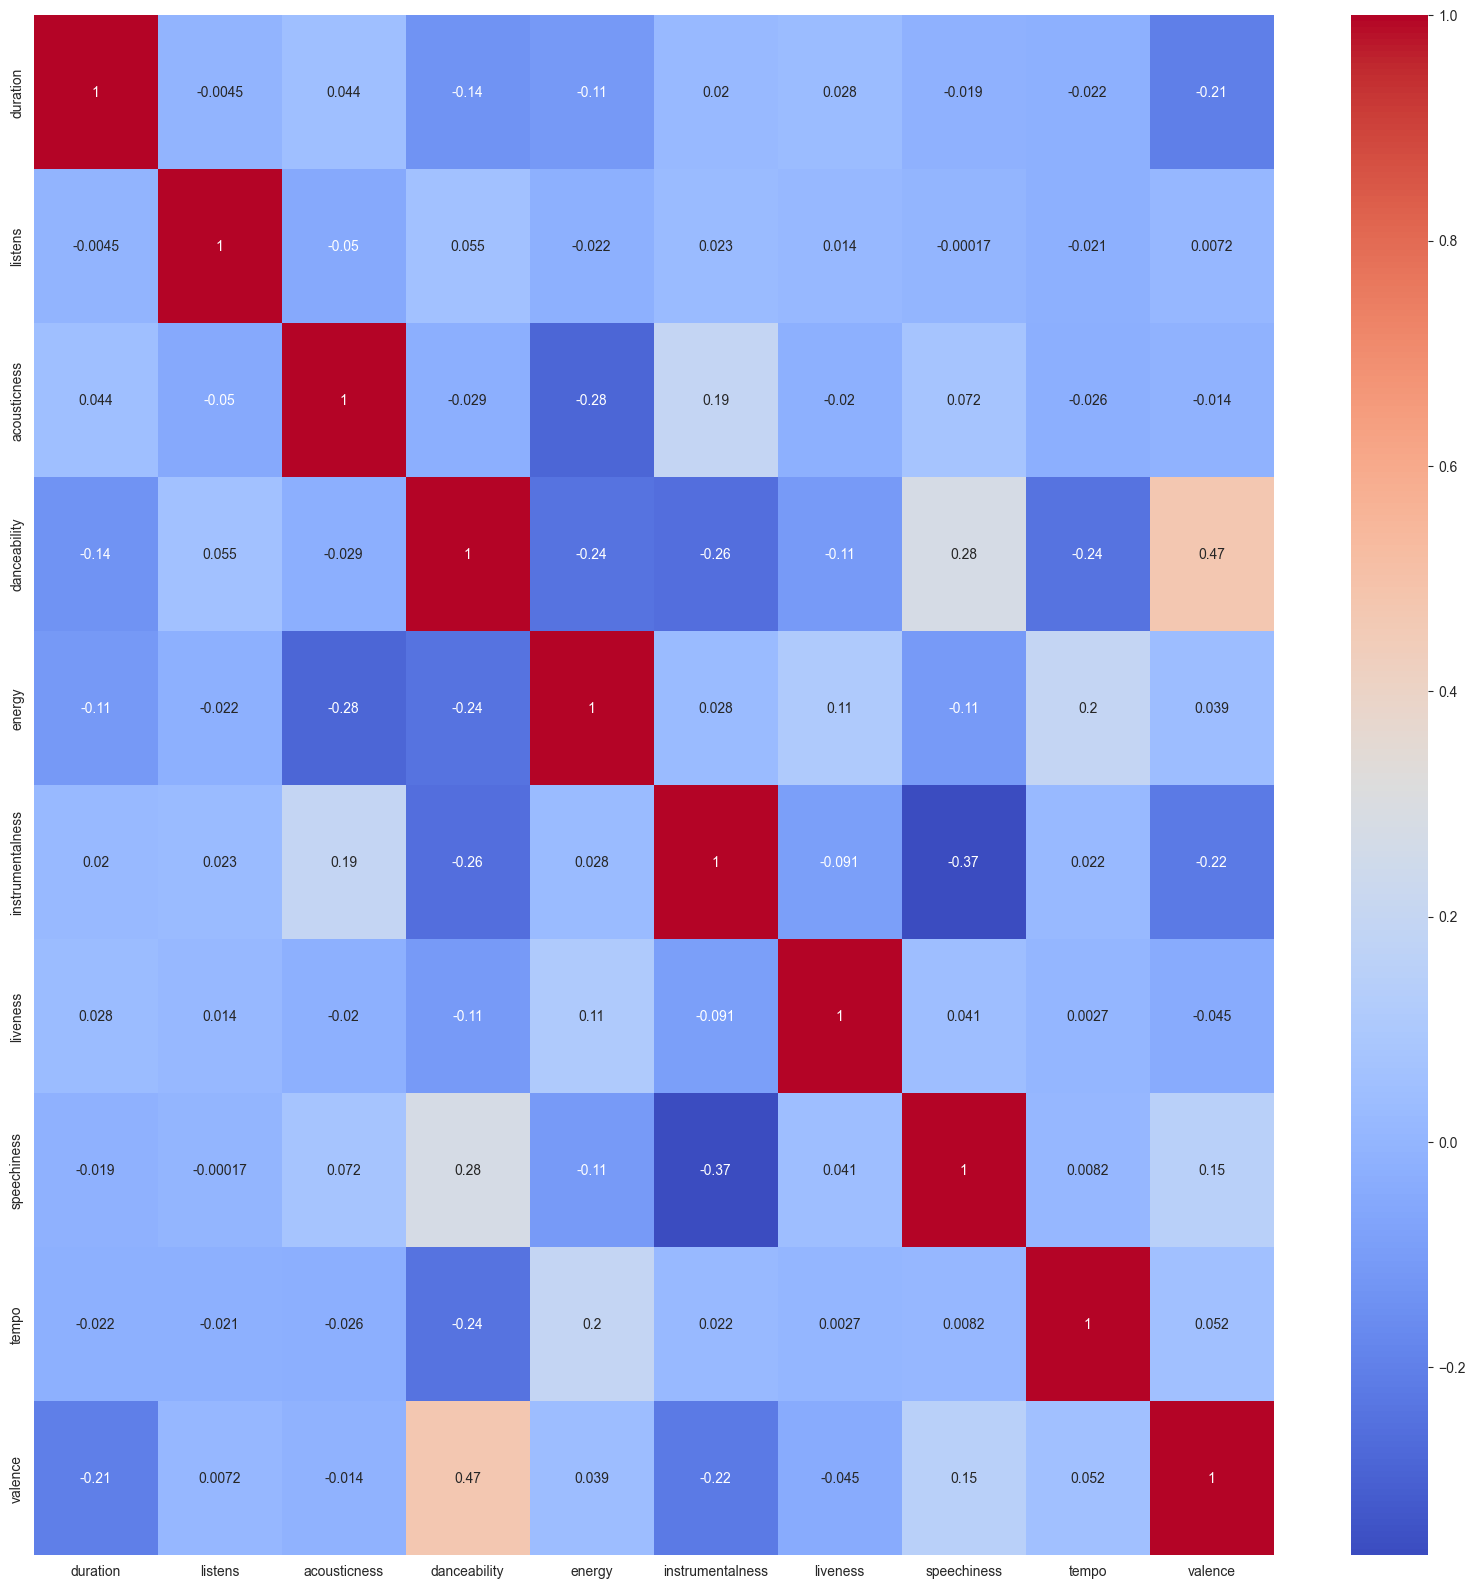

In [53]:
plt.figure(figsize=(20, 20))
sns.heatmap(music_data_clean[columns].corr(), annot=True, cmap="coolwarm")
plt.show()

## Data Cleaning


In [54]:
music_data_clean.duplicated().sum()

0

### Outliers


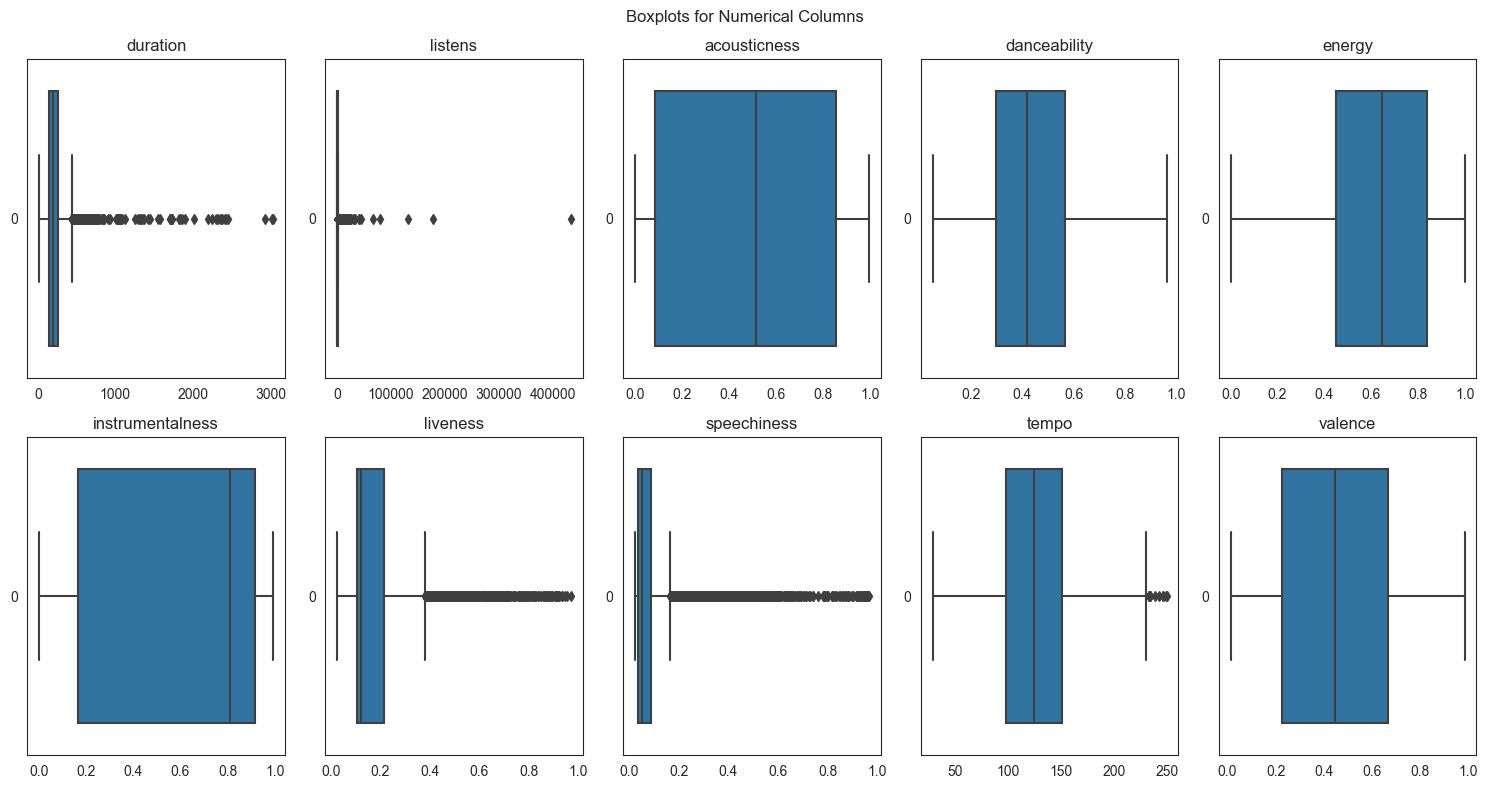

In [55]:
fig, axs = plt.subplots(2, 5, figsize=(15, 8))

# columns = [
#     "duration",
#     "interest",
#     "listens",
#     "acousticness",
#     "danceability",
#     "energy",
#     "instrumentalness",
#     "liveness",
#     "speechiness",
#     "tempo",
#     "valence",
# ]

plt.suptitle("Boxplots for Numerical Columns")

for i, column in enumerate(columns):
    sns.boxplot(data=music_data_clean[column], orient="h", ax=axs[i // 5, i % 5])
    axs[i // 5, i % 5].set_title(column)
    axs[i // 5, i % 5].set_xlabel("")

plt.tight_layout()

plt.show()

### Energy


**_Question:_** Which songs have the highest and lowest levels of energy?


In [56]:
music_data_clean["energy"].describe()

count    4802.000000
mean        0.625126
std         0.244051
min         0.000279
25%         0.450757
50%         0.648374
75%         0.837016
max         0.999768
Name: energy, dtype: float64

In [57]:
print(f"Highest energy level: {np.max(music_data_clean['energy'])}")
print(f"Lowest energy level: {np.min(music_data_clean['energy'])}")

Highest energy level: 0.999767599
Lowest energy level: 0.000278548


Now, we want to determine the genre of both songs.


In [58]:
music_data.loc[music_data_clean["energy"].argmax()]["genre_top"]

'Rock'

In [59]:
music_data.loc[music_data_clean["energy"].argmin()]["genre_top"]

'Rock'

Both the highest and lowest energy songs are Rock songs.


/Users/gajokremer/Documents/Career/Semester VII/Artificial_Intelligence/AI-Final-Project/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gajokremer/Documents/Career/Semester VII/Artificial_Intelligence/AI-Final-Project/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gajokremer/Documents/Career/Semester VII/Artificial_Intelligence/AI-Final-Project/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vect

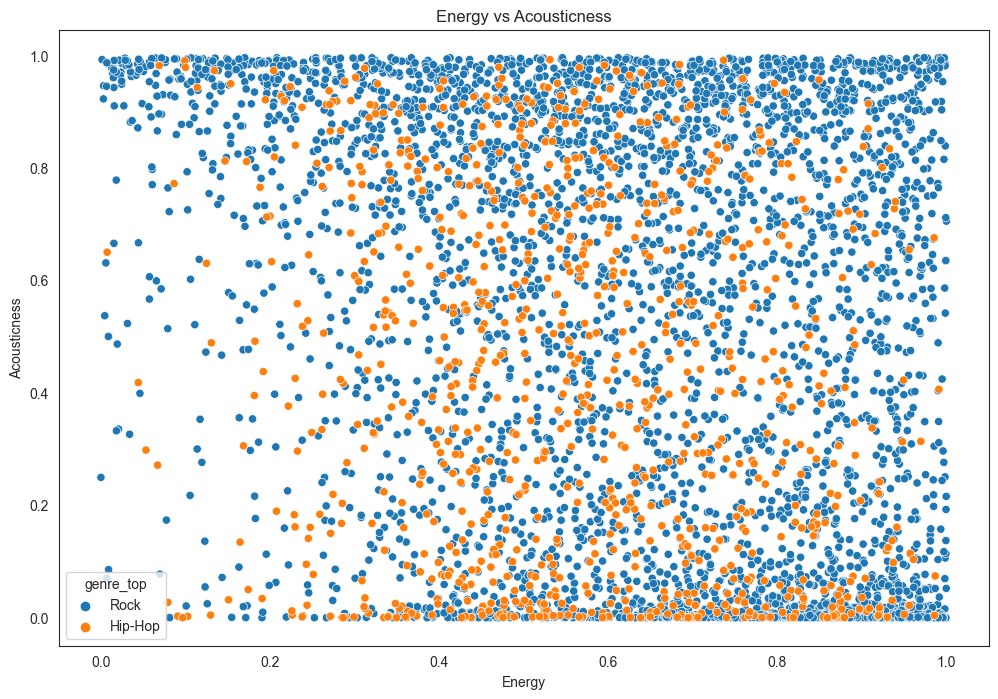

In [60]:
# scatterplot showing the relationship between energy and acousticness

plt.figure(figsize=(12, 8))
# sns.barplot(x="energy", y="acousticness", hue="genre_top", data=music_data)
sns.scatterplot(x="energy", y="acousticness", hue="genre_top", data=music_data_clean)
plt.title("Energy vs Acousticness")
plt.xlabel("Energy")
plt.ylabel("Acousticness")
plt.show()